# Neha Prajapati 

## Importing important libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Checking the correlation in these 2 variables 

<AxesSubplot:>

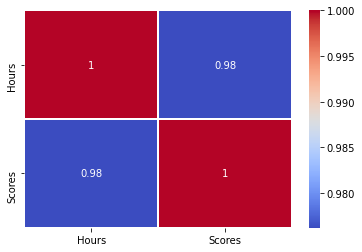

In [5]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linewidth = 1)

## Plotting the graph

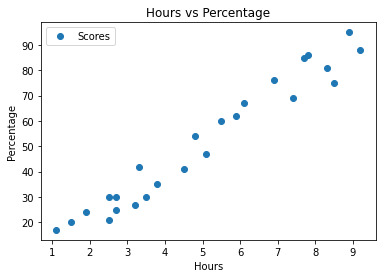

In [6]:
#Plotting the distribution of scores
data.plot(x = 'Hours',y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

## loading the data in x and y variables

In [7]:

x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

## Applying train test split model to separate the values for training and testing respectively and also applying linear regression 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Plotting the Regresion line

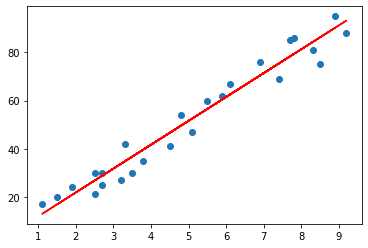

In [10]:
#Plotting the Regresion line
line = regressor.coef_*x+regressor.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line, color = 'Red')
plt.show()

In [11]:

#Testing Data- in Hours
print(x_test)
#Predicting the Scores
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
#Comparing Actual vs Predicted
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## if a student studies for 9.25 hrs/ day then predicted score will be 93.691. Check below how

In [13]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
ownpred = regressor.predict(test)
print("No. of hours = {}".format(hours))
print("Predicted score = {}".format(ownpred[0]))

No. of hours = 9.25
Predicted score = 93.69173248737535


In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
